# Hint and hint use analysis
This notebook is for the analysis of use of hints and examples in the PILA data.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import pingouin as pg

# Don't truncate pandas display output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Increase size of seaborn plot
sns.set(rc={'figure.figsize': (20, 8)})

## Read in data and prepare dataframes for analysis

In [5]:
# Read in csv file
df = pd.read_csv('csv/Qualtrics_Karel_clean_dataset_inner_with_diff_type.csv')

Group A saw hints and examples and Group B did not. Issues:
- Most students were in the same group for both experiences
- Some students were in one group for the first experience and the other group for the second experience
- Some students were in both groups for the second experience

(Exp2 and Exp3)

In [6]:
df.head()

,anonymousId,Qualtrics performed,Exp2 performed,Exp3 performed,Teacher,Duration_qualtrics,Country,Experience,CS_Classes,Expertise_1,Expertise_2,Expertise_3,Expertise_4,Expertise_5,Expertise_5_TEXT,1_CTT_1_Eng,2_CTT_2_Eng,3_CTT_3_Eng,4_CTT_4_Eng,5_CTT_5_Eng,6_CTT_6_Eng,7_CTT_7_Eng,8_CTT_8_Eng,9_CTT_9_Eng,10_CTT_10_Eng,11_CTT_11_Eng,12_CTT_12_Eng,13_CTT_13_Eng,14_CTT_14_Eng,15_CTT_15_Eng,16_Bebras_1_Eng,17_Bebras_2_Eng,18_Bebras_3_Eng,19_Bebras_4_Eng,20_Bebras_5_Eng,21_Bebras_6_Eng,22_Bebras_7_Eng,23_Bebras_8_Eng,24_Bebras_9_Eng,Year,Gender,Gender_3_TEXT,Language1,Language2,Bool,Exp2 Type,Exp3 Type,Same exp type,2_1,2_2,2_3,2_4,2_5,2_6,2_7,2_8,2_Bonus Task,3_1,3_2,3_3,3_4,3_5,3_6,3_Bonus Task,exp2 nbr performed,exp3 nbr performed,2_1_duration,2_2_duration,2_3_duration,2_4_duration,2_5_duration,2_6_duration,2_7_duration,2_8_duration,2_Bonus Task_duration,3_1_duration,3_2_duration,3_3_duration,3_4_duration,3_5_duration,3_6_duration,3_Bonus Task_duration,2_1_goodExampleUsed,2_2_goodExampleUsed,2_3_goodExampleUsed,2_4_goodExampleUsed,2_5_goodExampleUsed,2_6_goodExampleUsed,2_7_goodExampleUsed,2_8_goodExampleUsed,2_Bonus Task_goodExampleUsed,3_1_goodExampleUsed,3_2_goodExampleUsed,3_3_goodExampleUsed,3_4_goodExampleUsed,3_5_goodExampleUsed,3_6_goodExampleUsed,3_Bonus Task_goodExampleUsed,2_1_badExampleUsed,2_2_badExampleUsed,2_3_badExampleUsed,2_4_badExampleUsed,2_5_badExampleUsed,2_6_badExampleUsed,2_7_badExampleUsed,2_8_badExampleUsed,2_Bonus Task_badExampleUsed,3_1_badExampleUsed,3_2_badExampleUsed,3_3_badExampleUsed,3_4_badExampleUsed,3_5_badExampleUsed,3_6_badExampleUsed,3_Bonus Task_badExampleUsed,2_1_hintUsed,2_2_hintUsed,2_3_hintUsed,2_4_hintUsed,2_5_hintUsed,2_6_hintUsed,2_7_hintUsed,2_8_hintUsed,2_Bonus Task_hintUsed,3_1_hintUsed,3_2_hintUsed,3_3_hintUsed,3_4_hintUsed,3_5_hintUsed,3_6_hintUsed,3_Bonus Task_hintUsed,Expertise_sum,totalScore
0,6s4q+BaiL5aAyq05fOJ4/I36jlhPqy252nqoiQms+Ec=,True,True,True,Mr Chen,689,Singapore,3,5,2,2,3,4,NaN,NaN,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,True,B,B,True,1,0,1,0,1,1,1,0,-1,1,0,0,0,0,0,-1,8,6,64.0,211.0,606.0,204.0,135.0,424.0,706.0,301.0,NaN,124.0,293.0,702.0,165.0,446.0,684.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,6
1,q4bTMhFYK9JysIaPu/Glne6t49okkmCplDFt4+Lnjio=,True,True,True,Chan may lun,1028,Singapore,2,3,2,2,3,2,NaN,NaN,1,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,NaN,NaN,NaN,NaN,NaN,True,B,B,True,1,1,1,1,1,1,1,0,0,0,-1,-1,-1,-1,-1,-1,8,1,56.0,136.0,229.0,225.0,54.0,314.0,283.0,791.0,167.0,322.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,13
2,+EIBAvzNzZ9JHmqlY2usTLt6sk+JpU4l7Drkz+VIsTk=,True,True,True,Ms Chua,1153,Singapore,3,5,2,3,2,2,NaN,NaN,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,True,A,A,True,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,8,6,19.0,69.0,161.0,119.0,21.0,49.0,455.0,439.0,895.0,45.0,156.0,155.0,848.0,293.0,269.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,NaN,9,22
3,avBFNZbpf1PzL0Zn2vE1hKMg5EODpWcIhHvHg7HnS3Q=,True,True,True,Ms Chua,1263,Singapore,3,2,2,3,4,1,NaN,NaN,1,1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,True,A,A,True,1,1,1,0,1,1,0,-1,-1,0,1,0,0,-1,0,-1,7,5,24.0,176.0,164.0,210.0,33.0,865.0,998.0,NaN,NaN,471.0,268.0,584.0,322.0,NaN,816.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,10,12
4,fZF5WMHrQTsHe066bpFEPJEu8LaXMXafREyJ61NOB0c=,True,True,True,Ms Chua,1312,Sin

In [7]:
good_example_exp2_cols = ["2_1_goodExampleUsed",
                          "2_2_goodExampleUsed",
                          "2_3_goodExampleUsed",
                          "2_4_goodExampleUsed",
                          "2_5_goodExampleUsed",
                          "2_6_goodExampleUsed",
                          "2_7_goodExampleUsed",
                          "2_8_goodExampleUsed",
                          "2_Bonus Task_goodExampleUsed"]

good_example_exp3_cols = ["3_1_goodExampleUsed",
                          "3_2_goodExampleUsed",
                          "3_3_goodExampleUsed",
                          "3_4_goodExampleUsed",
                          "3_5_goodExampleUsed",
                          "3_6_goodExampleUsed",
                          "3_Bonus Task_goodExampleUsed"]

bad_example_exp2_cols = ["2_1_badExampleUsed",
                         "2_2_badExampleUsed",
                         "2_3_badExampleUsed",
                         "2_4_badExampleUsed",
                         "2_5_badExampleUsed",
                         "2_6_badExampleUsed",
                         "2_7_badExampleUsed",
                         "2_8_badExampleUsed",
                         "2_Bonus Task_badExampleUsed"]

bad_example_exp3_cols = ["3_1_badExampleUsed",
                         "3_2_badExampleUsed",
                         "3_3_badExampleUsed",
                         "3_4_badExampleUsed",
                         "3_5_badExampleUsed",
                         "3_6_badExampleUsed",
                         "3_Bonus Task_badExampleUsed"]

hint_exp2_cols = ["2_1_hintUsed",
                  "2_2_hintUsed",
                  "2_3_hintUsed",
                  "2_4_hintUsed",
                  "2_5_hintUsed",
                  "2_6_hintUsed",
                  "2_7_hintUsed",
                  "2_8_hintUsed",
                  "2_Bonus Task_hintUsed"]

hint_exp3_cols = ["3_1_hintUsed",
                  "3_2_hintUsed",
                  "3_3_hintUsed",
                  "3_4_hintUsed",
                  "3_5_hintUsed",
                  "3_6_hintUsed",
                  "3_Bonus Task_hintUsed"]


## Plot histograms of hint and example use across both experiences

Text(0, 0.5, 'Number of students with that total count')

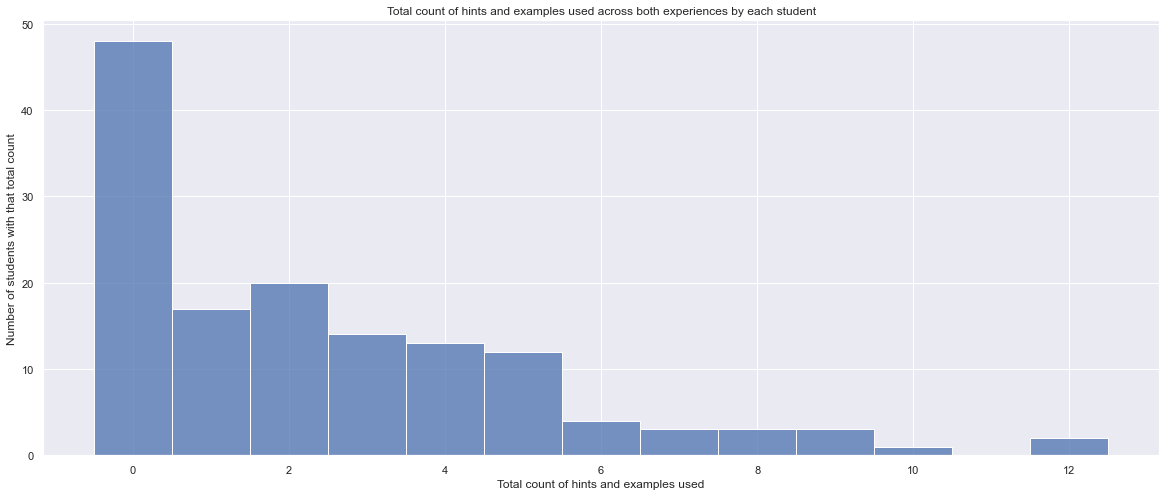

In [8]:
# Create a histogram for total count of hints and examples used across both experiences
resource_sum = df[good_example_exp2_cols + good_example_exp3_cols + bad_example_exp2_cols + bad_example_exp3_cols + hint_exp2_cols + hint_exp3_cols].sum(axis=1)
g = sns.histplot(resource_sum, discrete=True)
g.set_title('Total count of hints and examples used across both experiences by each student')
g.set_xlabel('Total count of hints and examples used')
g.set_ylabel('Number of students with that total count')

In [9]:
# Calculate correlation: Small positive relationship
temp_df = pd.DataFrame({"total": df[resource_sum != 0]["totalScore"], "resources": resource_sum[resource_sum != 0], "expertise": df[resource_sum != 0]["Expertise_sum"]})
pg.corr(temp_df["expertise"], temp_df["resources"])

# Calculate partial correlation: Nothing
# pg.partial_corr(data=temp_df, x = "resources", y = "total", covar="expertise")

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,92,0.212846,"[0.01, 0.4]",0.045304,0.02385,0.041646,1.004,0.53539


In [10]:
# Change the size of the following plots
sns.set(rc={'figure.figsize': (10, 8)})
sns.set(font_scale=1.5)

[Text(0.5, 1.0, 'Number of examples (good and bad) used in Experience 2')]

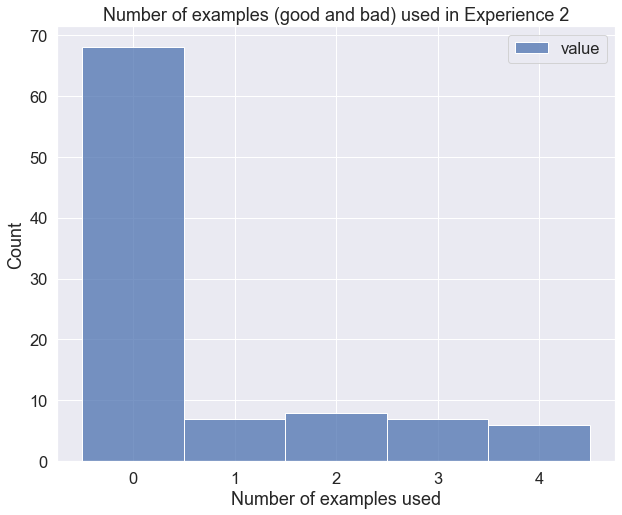

In [11]:
# Create a histogram for experience 2 only looking at students in group A

# Make long dataframe for experience 2
exp2_example_cols = good_example_exp2_cols + bad_example_exp2_cols
exp2_examples_long = pd.melt(df, id_vars=["anonymousId", "Exp2 Type"], value_vars = exp2_example_cols, var_name='example')

# Plot number of examples used 
example_counts = exp2_examples_long[exp2_examples_long["Exp2 Type"] == "A"].groupby(['anonymousId']).sum()
g = sns.histplot(example_counts, discrete=True)
g.set(xlabel='Number of examples used', ylabel='Count')
g.set(title='Number of examples (good and bad) used in Experience 2')


[Text(0.5, 1.0, 'Number of examples (good and bad) used in Experience 3')]

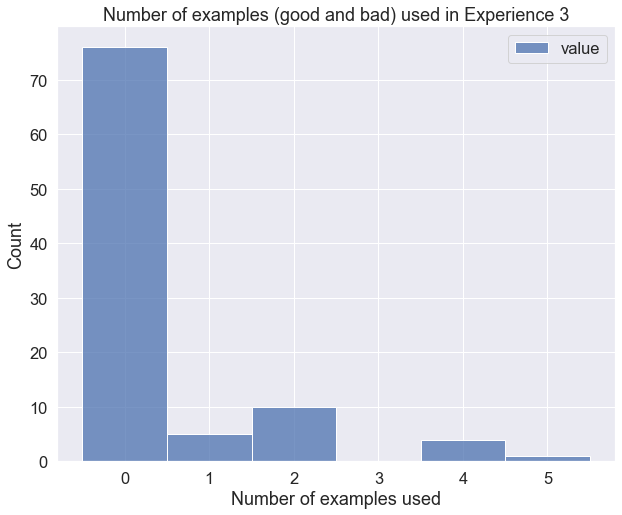

In [12]:
# Create a histogram for experience 3 only looking at students in group A

# Make long dataframe for experience 3
exp3_example_cols = good_example_exp3_cols + bad_example_exp3_cols
exp3_examples_long = pd.melt(df, id_vars=["anonymousId", "Exp3 Type"], value_vars = exp3_example_cols, var_name='example')

# Plot number of examples used 
example_counts = exp3_examples_long[exp3_examples_long["Exp3 Type"] == "A"].groupby(['anonymousId']).sum()
g = sns.histplot(example_counts, discrete=True)
g.set(xlabel='Number of examples used', ylabel='Count')
g.set(title='Number of examples (good and bad) used in Experience 3')

[Text(0.5, 1.0, 'Number of hints used in Experience 2')]

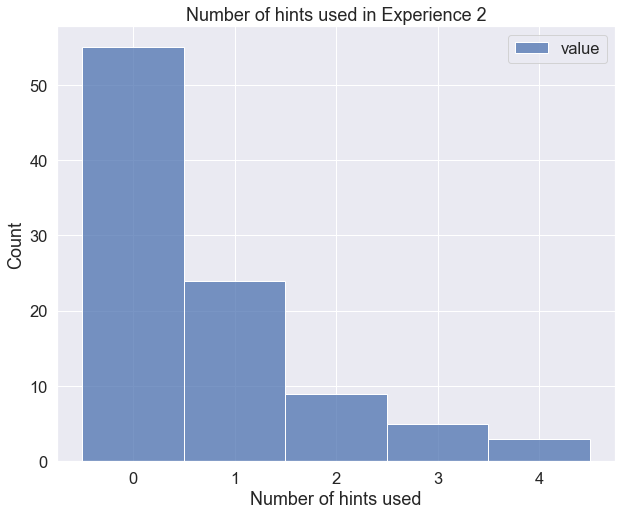

In [13]:
# Create a histogram for experience 2 only looking at students in group A

# Make long dataframe for experience 2
exp2_hints_long = pd.melt(df, id_vars=["anonymousId", "Exp2 Type"], value_vars = hint_exp2_cols, var_name='hint')

# Plot number of hints used 
hint_counts = exp2_hints_long[exp2_hints_long["Exp2 Type"] == "A"].groupby(['anonymousId']).sum()
g = sns.histplot(hint_counts, discrete=True)
g.set(xlabel='Number of hints used', ylabel='Count')
g.set(title='Number of hints used in Experience 2')

[Text(0.5, 1.0, 'Number of hints used in Experience 3')]

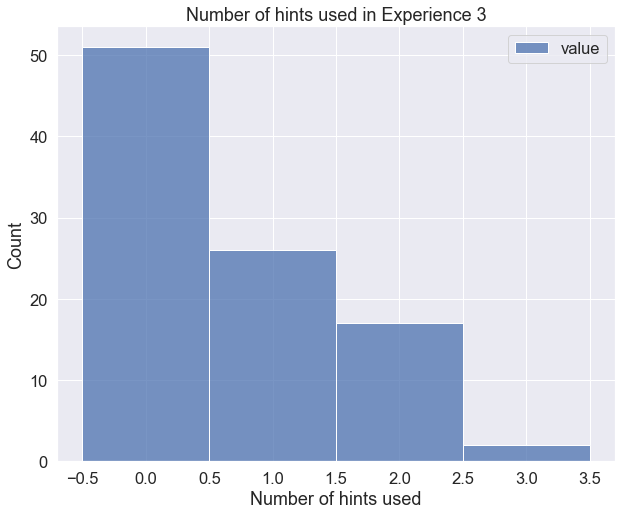

In [14]:
# Create a histogram for experience 3 only looking at students in group A

# Make long dataframe for experience 3
exp3_hints_long = pd.melt(df, id_vars=["anonymousId", "Exp3 Type"], value_vars = hint_exp3_cols, var_name='hint')

# Plot number of hints used 
hint_counts = exp3_hints_long[exp3_hints_long["Exp3 Type"] == "A"].groupby(['anonymousId']).sum()
g = sns.histplot(hint_counts, discrete=True)
g.set(xlabel='Number of hints used', ylabel='Count')
g.set(title='Number of hints used in Experience 3')

## Barplots showing influence of hint usage on average score per question
Three bars per question: Group A and used hints, Group A and didn’t use hints, and Group B

### Create dataframes for plotting

First create the following dataframe:

```
| question_id | hint_used | condition | score |
| 2_1         | 0         | A         | 0     |
| 2_1         | 1         | B         | 1     |
| 2_1         | 0         | A         | 0     |
```

Then create another dataframe that combines hint_used and condition and ignores both AB condition and B condition with hints used

```
| question_id | condition  | score |
| 2_1         | A0         | 0     |
| 2_1         | A1         | 1     |
| 2_1         | B          | 0     |
```

In [15]:
# Create an empty dataframe with the columns question_id, hint_used, condition, and score
exp2_hint_used_long_and_score = pd.DataFrame(columns=["question_id", "hint_used", "condition", "score"])
exp3_hint_used_long_and_score = pd.DataFrame(columns=["question_id", "hint_used", "condition", "score"])

# Iterate over rows in df
for index, row in df.iterrows():
    exp2_condition = row["Exp2 Type"]
    exp3_condition = row["Exp3 Type"]
    
    # Iterate over the exp2 hint columns in the row
    for i, cname in enumerate(hint_exp2_cols):
        # Set substr variable to i if i < 9 else set substr to " Bonus Task"
        qid = str(i+1) if i < 8 else "Bonus Task"
        exp2_hint_used_long_and_score = exp2_hint_used_long_and_score.append({"question_id": "2_" + qid, "hint_used": row[cname], "condition": exp2_condition, "score": row["2_" + qid]}, ignore_index=True)
    
    # Iterate over the exp3 hint columns in the row
    for i, cname in enumerate(hint_exp3_cols):
        # Set substr variable to i if i < 5 else set substr to " Bonus Task"
        qid = str(i+1) if i < 5 else "Bonus Task"
        exp3_hint_used_long_and_score = exp3_hint_used_long_and_score.append({"question_id": "3_" + qid, "hint_used": row[cname], "condition": exp3_condition, "score": row["3_" + qid]}, ignore_index=True)        

exp2_hint_used_long_and_score.head()

,question_id,hint_used,condition,score
0,2_1,NaN,B,1
1,2_2,NaN,B,0
2,2_3,NaN,B,1
3,2_4,NaN,B,0
4,2_5,NaN,B,1


In [16]:
# Create an empty dataframe with the columns question_id, condition, and score
exp2_hint_used_combcond = pd.DataFrame(columns=["question_id", "condition", "score"])
exp3_hint_used_combcond = pd.DataFrame(columns=["question_id", "condition", "score"])

# Replace all values of "AB" with "A" in the condition column
exp2_hint_used_long_and_score["condition"] = exp2_hint_used_long_and_score["condition"].replace("AB", "A")
exp3_hint_used_long_and_score["condition"] = exp3_hint_used_long_and_score["condition"].replace("AB", "A")

for i, row in exp2_hint_used_long_and_score.iterrows():
    # Skip rows with condition AB
    if row["condition"] == "AB":
        continue
    if row["condition"] == "A" and row["hint_used"] == 1:
        exp2_hint_used_combcond = exp2_hint_used_combcond.append({"question_id": row["question_id"], "condition": "A1", "score": row["score"]}, ignore_index=True)
    elif row["condition"] == "A" and row["hint_used"] == 0:
        exp2_hint_used_combcond = exp2_hint_used_combcond.append({"question_id": row["question_id"], "condition": "A0", "score": row["score"]}, ignore_index=True)
    elif row["condition"] == "B":
        exp2_hint_used_combcond = exp2_hint_used_combcond.append({"question_id": row["question_id"], "condition": "B", "score": row["score"]}, ignore_index=True)

for i, row in exp3_hint_used_long_and_score.iterrows():
    # Skip rows with condition AB
    if row["condition"] == "AB":
        continue
    if row["condition"] == "A" and row["hint_used"] == 1:
        exp3_hint_used_combcond = exp3_hint_used_combcond.append({"question_id": row["question_id"], "condition": "A1", "score": row["score"]}, ignore_index=True)
    elif row["condition"] == "A" and row["hint_used"] == 0:
        exp3_hint_used_combcond = exp3_hint_used_combcond.append({"question_id": row["question_id"], "condition": "A0", "score": row["score"]}, ignore_index=True)
    elif row["condition"] == "B":
        exp3_hint_used_combcond = exp3_hint_used_combcond.append({"question_id": row["question_id"], "condition": "B", "score": row["score"]}, ignore_index=True)

### Barplots showing results of each dataframe

In [17]:
# Change the size of the following plots
sns.set(rc={'figure.figsize': (20, 8)})
sns.set(font_scale=1.5)

In [18]:
# # Replace values of -1 in correct with NaN
# exp2_hint_used_long_and_score["score"] = exp2_hint_used_long_and_score["score"].replace(-1, np.nan)

# # Use seaboarn to plot average score vs. hint usage and Exp2 Type
# g = sns.catplot(x="question_id", y="score", hue="hint_used", col="condition", data=exp2_hint_used_long_and_score, kind="bar")

# # Rotate the x axis labels of g by 45 degrees
# g.set_xticklabels(rotation = 90)

[Text(0, 0.5, 'Average Score')]

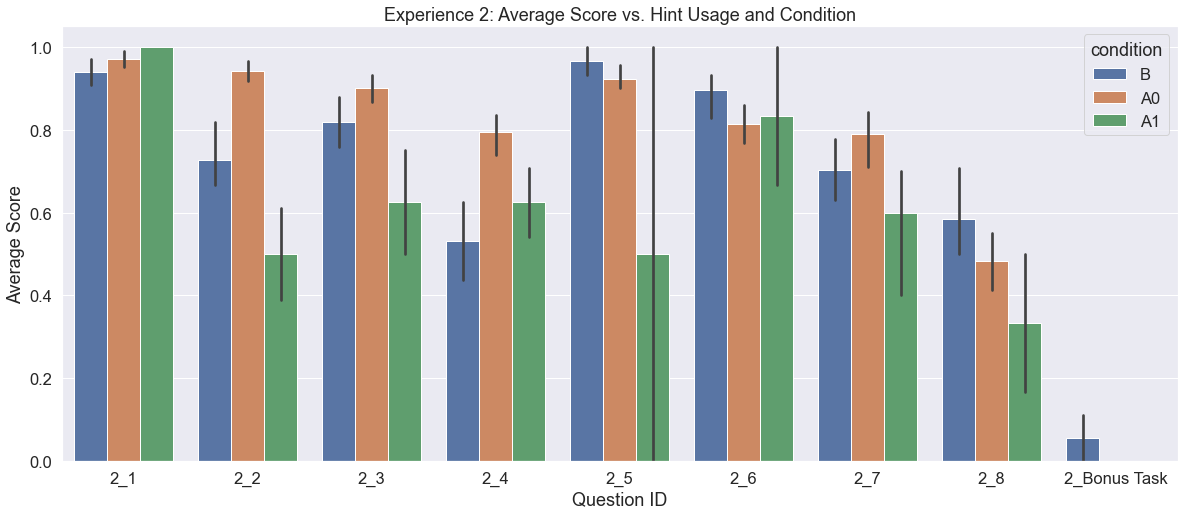

In [19]:
# Replace values of -1 in correct with NaN
exp2_hint_used_combcond["score"] = exp2_hint_used_combcond["score"].replace(-1, np.nan)

# Use seaboarn to plot average score vs. hint usage and Exp2 Type
# g = sns.pointplot(x="question_id", y="score", hue="condition", data=exp2_hint_used_combcond, join=False, dodge=0.2)
g = sns.barplot(x="question_id", y="score", hue="condition", data=exp2_hint_used_combcond, ci=68)
# Set title of g
g.set(title="Experience 2: Average Score vs. Hint Usage and Condition")
g.set(xlabel="Question ID")
g.set(ylabel="Average Score")

[Text(0, 0.5, 'Average Score')]

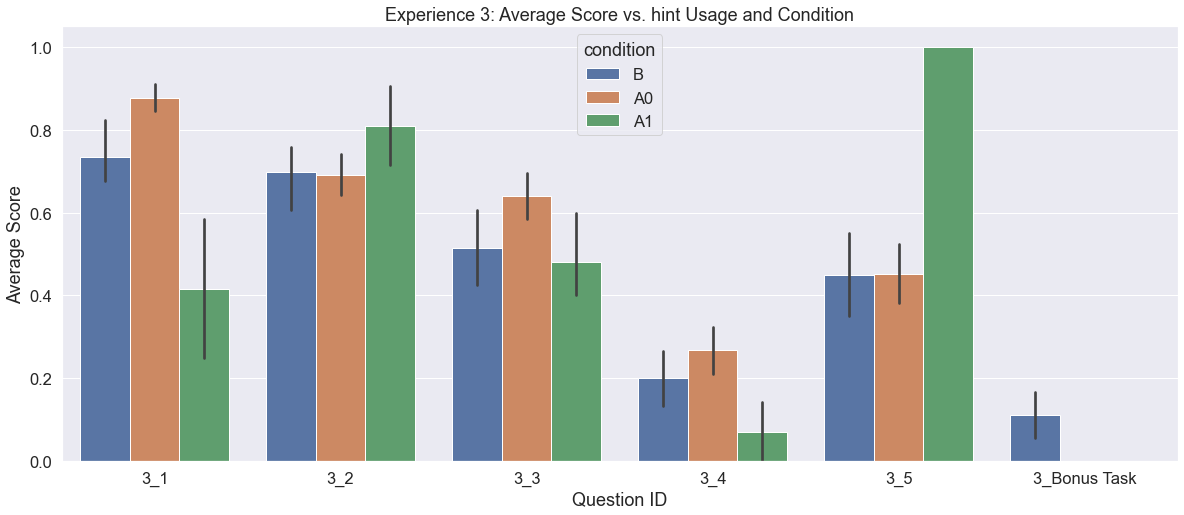

In [20]:
# Replace values of -1 in correct with NaN
from configparser import LegacyInterpolation


exp3_hint_used_combcond["score"] = exp3_hint_used_combcond["score"].replace(-1, np.nan)

# Use seaboarn to plot average score vs. hint usage and Exp2 Type
# g = sns.pointplot(x="question_id", y="score", hue="condition", data=exp3_hint_used_combcond, join=False, dodge=0.2)
g = sns.barplot(x="question_id", y="score", hue="condition", data=exp3_hint_used_combcond, ci=68)
# Set title of g
g.set(title="Experience 3: Average Score vs. hint Usage and Condition")
g.set(xlabel="Question ID")
g.set(ylabel="Average Score")

## Barplots showing influence of example usage on average score per question
Three bars per question: Group A and used examples, Group A and didn’t use examples, and Group B

### Create dataframes for plotting

First create the following dataframe:

```
| question_id | example_used | condition | score |
| 2_1         | 0            | A         | 0     |
| 2_1         | 1            | B         | 1     |
| 2_1         | 0            | A         | 0     |
```

Then create another dataframe that combines example_used and condition and ignores both AB condition and B condition with examples used

```
| question_id | condition  | score |
| 2_1         | A0         | 0     |
| 2_1         | A1         | 1     |
| 2_1         | B          | 0     |
```

In [21]:
# Create an empty dataframe with the columns question_id, example_used, condition, and score
exp2_example_used_long_and_score = pd.DataFrame(columns=["question_id", "example_used", "condition", "score"])
exp3_example_used_long_and_score = pd.DataFrame(columns=["question_id", "example_used", "condition", "score"])

# Iterate over rows in df
for index, row in df.iterrows():
    exp2_condition = row["Exp2 Type"]
    exp3_condition = row["Exp3 Type"]
    
    # Iterate over the exp2 good_example columns in the row
    for i, cname in enumerate(good_example_exp2_cols):
        # Set qid to i if i < 9 else set substr to " Bonus Task"
        qid = str(i+1) if i < 8 else "Bonus Task"
        exp2_example_used_long_and_score = exp2_example_used_long_and_score.append({"question_id": "2_" + qid, "good_example_used": row[cname], "bad_example_used": row["2_" + qid + "_badExampleUsed"], "condition": exp2_condition, "score": row["2_" + qid]}, ignore_index=True)
    
    # Iterate over the exp3 example columns in the row
    for i, cname in enumerate(good_example_exp3_cols):
        # Set substr variable to i if i < 5 else set substr to " Bonus Task"
        qid = str(i+1) if i < 5 else "Bonus Task"
        exp3_example_used_long_and_score = exp3_example_used_long_and_score.append({"question_id": "3_" + qid, "good_example_used": row[cname], "bad_example_used": row["3_" + qid + "_badExampleUsed"], "condition": exp3_condition, "score": row["3_" + qid]}, ignore_index=True)        

# Head
exp3_example_used_long_and_score.head()

,question_id,example_used,condition,score,bad_example_used,good_example_used
0,3_1,NaN,B,1,NaN,NaN
1,3_2,NaN,B,0,NaN,NaN
2,3_3,NaN,B,0,NaN,NaN
3,3_4,NaN,B,0,NaN,NaN
4,3_5,NaN,B,0,NaN,NaN


In [22]:
# Create an empty dataframe with the columns question_id, condition, and score
exp2_example_used_combcond = pd.DataFrame(columns=["question_id", "condition", "score"])
exp3_example_used_combcond = pd.DataFrame(columns=["question_id", "condition", "score"])

# Replace all values of "AB" with "A" in the condition column
exp2_example_used_long_and_score["condition"] = exp2_example_used_long_and_score["condition"].replace("AB", "A")
exp3_example_used_long_and_score["condition"] = exp3_example_used_long_and_score["condition"].replace("AB", "A")

for i, row in exp2_example_used_long_and_score.iterrows():
    # Skip rows with condition AB
    if row["condition"] == "AB":
        continue
    if row["condition"] == "A" and (row["good_example_used"] == 1 or row["bad_example_used"] == 1):
        exp2_example_used_combcond = exp2_example_used_combcond.append({"question_id": row["question_id"], "condition": "A1", "score": row["score"]}, ignore_index=True)
    elif row["condition"] == "A" and (row["good_example_used"] == 0 and row["bad_example_used"] == 0):
        exp2_example_used_combcond = exp2_example_used_combcond.append({"question_id": row["question_id"], "condition": "A0", "score": row["score"]}, ignore_index=True)
    elif row["condition"] == "B":
        exp2_example_used_combcond = exp2_example_used_combcond.append({"question_id": row["question_id"], "condition": "B", "score": row["score"]}, ignore_index=True)

for i, row in exp3_example_used_long_and_score.iterrows():
    # Skip rows with condition AB
    if row["condition"] == "AB":
        continue
    if row["condition"] == "A" and (row["good_example_used"] == 1 or row["bad_example_used"] == 1):
        exp3_example_used_combcond = exp3_example_used_combcond.append({"question_id": row["question_id"], "condition": "A1", "score": row["score"]}, ignore_index=True)
    elif row["condition"] == "A" and (row["good_example_used"] == 0 and row["bad_example_used"] == 0):
        exp3_example_used_combcond = exp3_example_used_combcond.append({"question_id": row["question_id"], "condition": "A0", "score": row["score"]}, ignore_index=True)
    elif row["condition"] == "B":
        exp3_example_used_combcond = exp3_example_used_combcond.append({"question_id": row["question_id"], "condition": "B", "score": row["score"]}, ignore_index=True)

[Text(0, 0.5, 'Average Score')]

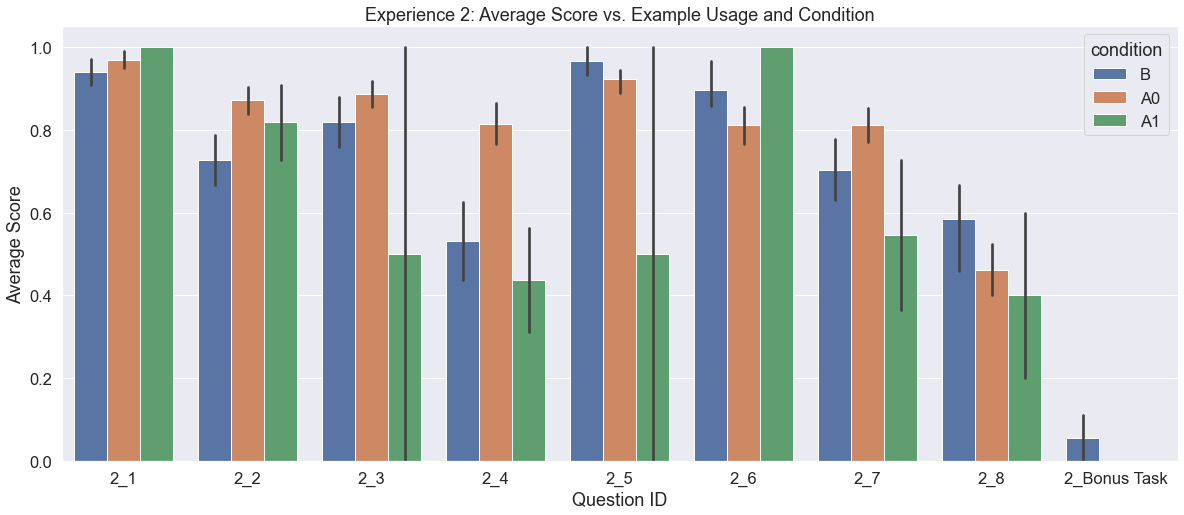

In [23]:
# Replace values of -1 in correct with NaN
exp2_example_used_combcond["score"] = exp2_example_used_combcond["score"].replace(-1, np.nan)

# Use seaboarn to plot average score vs. example usage and Exp2 Type
# g = sns.pointplot(x="question_id", y="score", hue="condition", data=exp2_example_used_combcond, join=False, dodge=0.2)
g = sns.barplot(x="question_id", y="score", hue="condition", data=exp2_example_used_combcond, ci=68)
# Set title of g
g.set(title="Experience 2: Average Score vs. Example Usage and Condition")
g.set(xlabel="Question ID")
g.set(ylabel="Average Score")

[Text(0, 0.5, 'Average Score')]

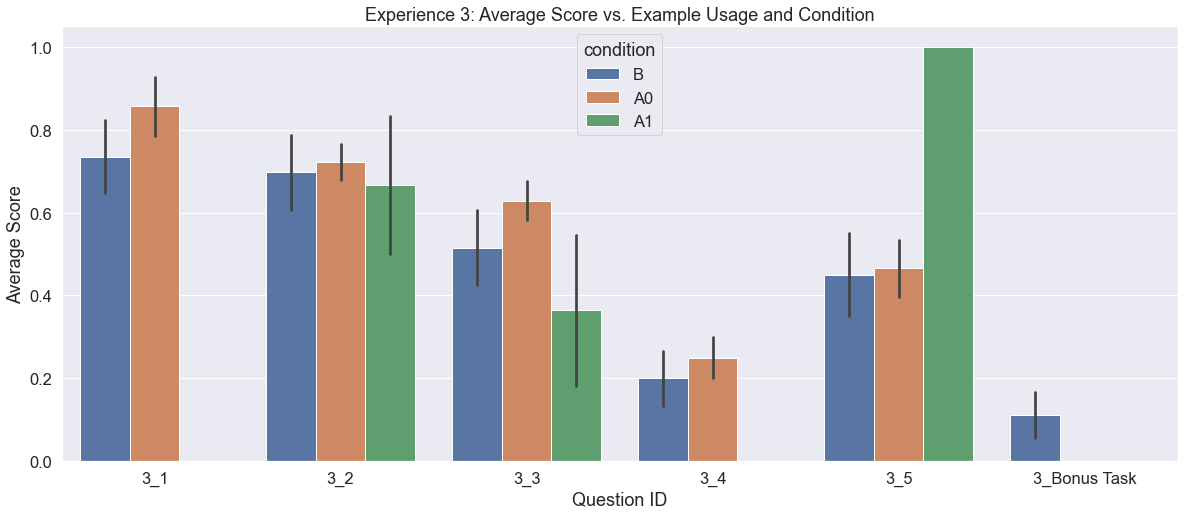

In [24]:
# Replace values of -1 in correct with NaN
exp3_example_used_combcond["score"] = exp3_example_used_combcond["score"].replace(-1, np.nan)

# Use seaboarn to plot average score vs. example usage and Exp2 Type
# g = sns.pointplot(x="question_id", y="score", hue="condition", data=exp3_example_used_combcond, join=False, dodge=0.2)
g = sns.barplot(x="question_id", y="score", hue="condition", data=exp3_example_used_combcond, ci=68)
# Set title of g
g.set(title="Experience 3: Average Score vs. Example Usage and Condition")
g.set(xlabel="Question ID")
g.set(ylabel="Average Score")

## Barplots showing influence of hint or example usage on average score per question

### Create dataframe for plotting
Create one dataframe that combines hint_used/example_used and condition and ignores both AB condition and B condition with hints used

```
| question_id | condition  | score |
| 2_1         | A0         | 0     |
| 2_1         | A1         | 1     |
| 2_1         | B          | 0     |
```

In [25]:
# Create an empty dataframe with the columns question_id, hint_used, condition, and score
exp2_resource_used = pd.DataFrame(columns=["question_id", "condition", "score"])
exp3_resource_used = pd.DataFrame(columns=["question_id", "condition", "score"])

# Iterate over rows in df
for index, row in df.iterrows():
    exp2_condition = row["Exp2 Type"]
    exp3_condition = row["Exp3 Type"]

    exp2_cols = good_example_exp2_cols + bad_example_exp2_cols + hint_exp2_cols
    exp3_cols = good_example_exp3_cols + bad_example_exp3_cols + hint_exp3_cols
    
    # Iterate over the exp3 columns in the row
    for i, cname in enumerate(good_example_exp2_cols):
        # Set substr variable to i if i < 9 else set substr to " Bonus Task"
        qid = str(i+1) if i < 8 else "Bonus Task"
        condition = exp2_condition + "1" if (row[cname] == 1 or row["2_" + qid + "_badExampleUsed"] == 1 or row["2_" + qid + "_hintUsed"] == 1) else exp2_condition + "0"
        exp2_resource_used = exp2_resource_used.append({"question_id": "2_" + qid, "condition": condition, "score": row["2_" + qid]}, ignore_index=True)
    
    # Iterate over the exp3 columns in the row
    for i, cname in enumerate(good_example_exp3_cols):
        # Set substr variable to i if i < 5 else set substr to " Bonus Task"
        qid = str(i+1) if i < 5 else "Bonus Task"
        condition = exp3_condition + "1" if (row[cname] == 1 or row["3_" + qid + "_badExampleUsed"] == 1 or row["3_" + qid + "_hintUsed"] == 1) else exp3_condition + "0"
        exp3_resource_used = exp3_resource_used.append({"question_id": "3_" + qid, "condition": condition, "score": row["3_" + qid]}, ignore_index=True)

print(exp2_resource_used.head())
print(exp2_resource_used.head())

  question_id condition score
0         2_1        B0     1
1         2_2        B0     0
2         2_3        B0     1
3         2_4        B0     0
4         2_5        B0     1
  question_id condition score
0         2_1        B0     1
1         2_2        B0     0
2         2_3        B0     1
3         2_4        B0     0
4         2_5        B0     1


[Text(0, 0.5, 'Average Score')]

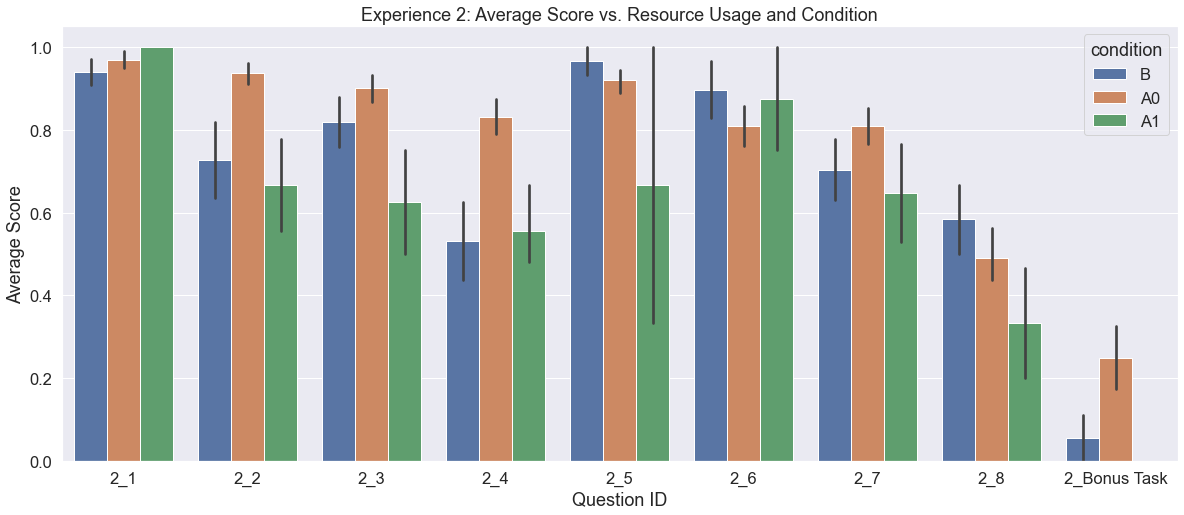

In [26]:
# Replace values of -1 in correct with NaN
exp2_resource_used["score"] = exp2_resource_used["score"].replace(-1, np.nan)

# Replace values of AB in the condition column with A
exp2_resource_used["condition"] = exp2_resource_used["condition"].replace("AB0", "A0")
exp2_resource_used["condition"] = exp2_resource_used["condition"].replace("AB1", "A1")

# Replace values of B0 and B1 in the condition column with B
exp2_resource_used["condition"] = exp2_resource_used["condition"].replace("B0", "B")
exp2_resource_used["condition"] = exp2_resource_used["condition"].replace("B1", "B")

# Use seaboarn to plot average score vs. example usage and Exp2 Type
# g = sns.pointplot(x="question_id", y="score", hue="condition", data=exp2_example_used_combcond, join=False, dodge=0.2)
g = sns.barplot(x="question_id", y="score", hue="condition", data=exp2_resource_used, ci=68)
# Set title of g
g.set(title="Experience 2: Average Score vs. Resource Usage and Condition")
g.set(xlabel="Question ID")
g.set(ylabel="Average Score")

[Text(0, 0.5, 'Average Score')]

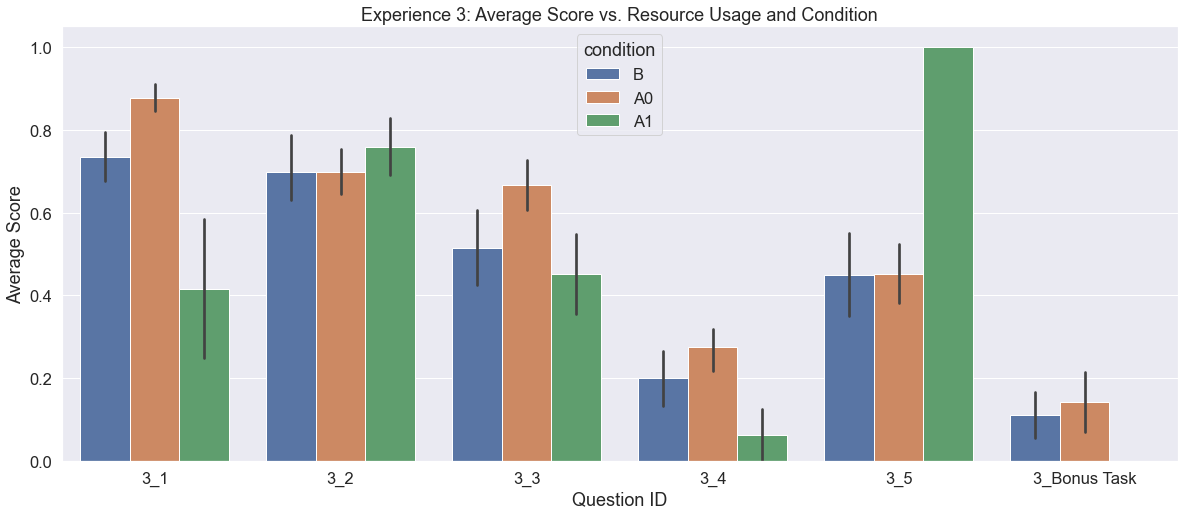

In [27]:
# Replace values of -1 in correct with NaN
exp3_resource_used["score"] = exp3_resource_used["score"].replace(-1, np.nan)

# Replace values of AB in the condition column with A
exp3_resource_used["condition"] = exp3_resource_used["condition"].replace("AB0", "A0")
exp3_resource_used["condition"] = exp3_resource_used["condition"].replace("AB1", "A1")

# Replace values of B0 and B1 in the condition column with B
exp3_resource_used["condition"] = exp3_resource_used["condition"].replace("B0", "B")
exp3_resource_used["condition"] = exp3_resource_used["condition"].replace("B1", "B")

# Use seaboarn to plot average score vs. example usage and Exp3 Type
# g = sns.pointplot(x="question_id", y="score", hue="condition", data=exp3_example_used_combcond, join=False, dodge=0.2)
g = sns.barplot(x="question_id", y="score", hue="condition", data=exp3_resource_used, ci=68)
# Set title of g
g.set(title="Experience 3: Average Score vs. Resource Usage and Condition")
g.set(xlabel="Question ID")
g.set(ylabel="Average Score")